In [1]:
e = 0
for g in range(1,11):
    e = e + g
    print(e)
print(e)

1
3
6
10
15
21
28
36
45
55
55


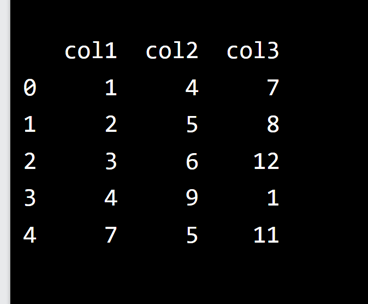

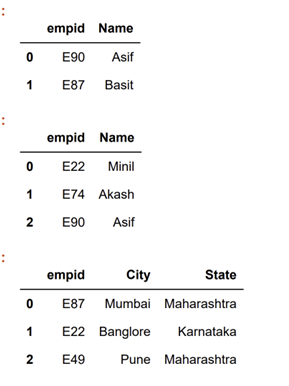

In [2]:
import pandas as pd

In [17]:
Empid = ['E90','E87']
name = ['Asif','Basit']



In [18]:
emp1= pd.DataFrame({'empid':Empid,
                     'Name':name})
emp1

,empid,Name
0,E90,Asif
1,E87,Basit


In [3]:
emp2= pd.DataFrame({'empid':['E22','E74','E90'],
 'Name':['Minil','Akash','Asif']})
emp2

,empid,Name
0,E22,Minil
1,E74,Akash
2,E90,Asif


In [4]:
employees = pd.concat([emp1,emp2])
employees

,empid,Name
0,E90,Asif
1,E87,Basit
0,E22,Minil
1,E74,Akash
2,E90,Asif


In [5]:
#Concat Dataframes
# Method-2
employees = pd.concat([emp1,emp2],ignore_index = True)
employees


,empid,Name
0,E90,Asif
1,E87,Basit
2,E22,Minil
3,E74,Akash
4,E90,Asif


## check for duplicates after concatenation

In [6]:
employees.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [7]:
duplicates =employees.loc[employees.duplicated(),]
duplicates

,empid,Name
4,E90,Asif


In [9]:
employees = employees.drop_duplicates()
employees

,empid,Name
0,E90,Asif
1,E87,Basit
2,E22,Minil
3,E74,Akash


In [10]:
address= pd.DataFrame({'empid':['E87','E22','E49'], 
 'City':['Mumbai','Banglore','Pune'] , 
 'State':['Maharashtra','Karnataka','Maharashtra']})
address

,empid,City,State
0,E87,Mumbai,Maharashtra
1,E22,Banglore,Karnataka
2,E49,Pune,Maharashtra


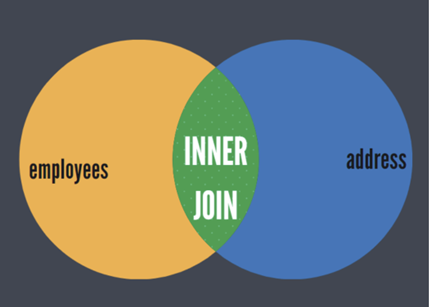

In [11]:
inner = pd.merge(employees,address,on = 'empid')
inner

,empid,Name,City,State
0,E87,Basit,Mumbai,Maharashtra
1,E22,Minil,Banglore,Karnataka


In [12]:
inner = pd.merge(employees,address,on = 'empid',how = 'inner')
inner

,empid,Name,City,State
0,E87,Basit,Mumbai,Maharashtra
1,E22,Minil,Banglore,Karnataka


## Left Outer Join

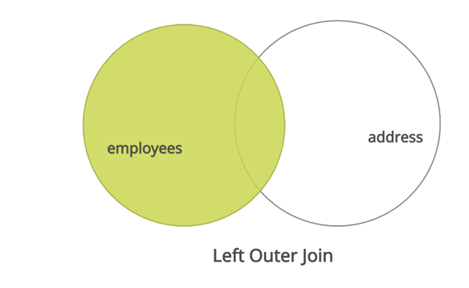

In [13]:
left = pd.merge(employees, address,on = 'empid', how = 'left')
left

,empid,Name,City,State
0,E90,Asif,NaN,NaN
1,E87,Basit,Mumbai,Maharashtra
2,E22,Minil,Banglore,Karnataka
3,E74,Akash,NaN,NaN


# Right outer Join

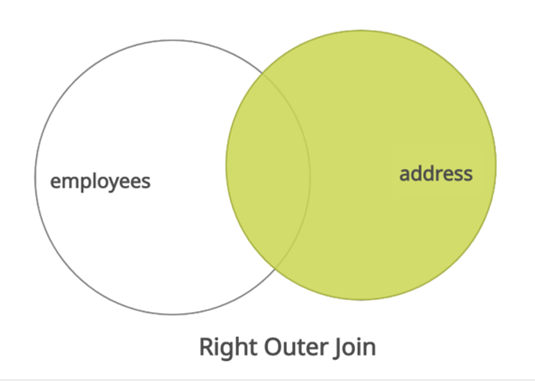

In [14]:
right = pd.merge(employees,address, on = 'empid',how = 'right')
right

,empid,Name,City,State
0,E87,Basit,Mumbai,Maharashtra
1,E22,Minil,Banglore,Karnataka
2,E49,NaN,Pune,Maharashtra


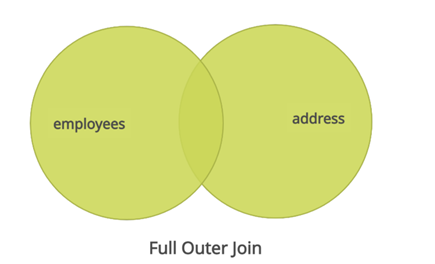

In [19]:
full = pd.merge(employees, address, on = 'empid',how = 'outer')
full

,empid,Name,City,State
0,E90,Asif,NaN,NaN
1,E87,Basit,Mumbai,Maharashtra
2,E22,Minil,Banglore,Karnataka
3,E74,Akash,NaN,NaN
4,E49,NaN,Pune,Maharashtra


In [21]:
# Salary Data
sal = pd.DataFrame({'empid':['E87','E22','E74','E90','E49'],
                   'salary':['$10,000','$30,000','$20,000','$60,000','$90,000']})
sal

,empid,salary
0,E87,"$10,000"
1,E22,"$30,000"
2,E74,"$20,000"
3,E90,"$60,000"
4,E49,"$90,000"


# Add Salary details ( Merge sal & full dataframes)

In [22]:
employee_details = pd.merge(full, sal , on = 'empid',how = 'inner')
employee_details

,empid,Name,City,State,salary
0,E90,Asif,NaN,NaN,"$60,000"
1,E87,Basit,Mumbai,Maharashtra,"$10,000"
2,E22,Minil,Banglore,Karnataka,"$30,000"
3,E74,Akash,NaN,NaN,"$20,000"
4,E49,NaN,Pune,Maharashtra,"$90,000"


In [24]:
# Employee experience
exp = pd.DataFrame({'employee_id':['E87','E22','E74','E90','E49'],
 'experience':['5 years','3 years','7 years','2 years','10 years']})
exp

,employee_id,experience
0,E87,5 years
1,E22,3 years
2,E74,7 years
3,E90,2 years
4,E49,10 years


In [26]:
employee_details1 = pd.merge(employee_details,exp, 
                             left_on = 'empid',
                             right_on ='employee_id',
                             how = 'inner')
employee_details1

,empid,Name,City,State,salary,employee_id,experience
0,E90,Asif,NaN,NaN,"$60,000",E90,2 years
1,E87,Basit,Mumbai,Maharashtra,"$10,000",E87,5 years
2,E22,Minil,Banglore,Karnataka,"$30,000",E22,3 years
3,E74,Akash,NaN,NaN,"$20,000",E74,7 years
4,E49,NaN,Pune,Maharashtra,"$90,000",E49,10 years


In [27]:
employee_details1 = employee_details1.drop("employee_id" , axis = 1)
employee_details1

,empid,Name,City,State,salary,experience
0,E90,Asif,NaN,NaN,"$60,000",2 years
1,E87,Basit,Mumbai,Maharashtra,"$10,000",5 years
2,E22,Minil,Banglore,Karnataka,"$30,000",3 years
3,E74,Akash,NaN,NaN,"$20,000",7 years
4,E49,NaN,Pune,Maharashtra,"$90,000",10 years


In [11]:
df = pd.read_csv("C:\\Users\\Savita Seharawat\\Desktop\\data sets\\titanic.csv")

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.dropna()

### head command is used to show top 5 records 

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [32]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q


In [40]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [42]:
df["Pclass"] == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [54]:
df1 = df.loc[df["Pclass"] == 1]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
df1['Pclass'].unique()

array([1], dtype=int64)

In [18]:
df2 = df[df['Pclass'] != 1]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [19]:
df2['Pclass'].unique()

array([3, 2], dtype=int64)

# Groupby 

In [47]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [58]:
df.shape

(891, 12)

In [67]:
df.shape[0]

891

In [74]:
df.groupby('Pclass')["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [29]:
df3 = df.groupby('Pclass')
df3['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [68]:
df4 = df.groupby('Sex')
df4['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [77]:
df3 = df.groupby('Pclass')

In [85]:
df3.get_group(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Get Groups
#### The pandas GroupBy method get_group() is used to select or extract only one group from the GroupBy object.

In [57]:
df5.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
df = df.rename(columns = {'PassengerId' :'id','Cabin':'cabin'})

In [87]:
df

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
df["Name"].str.split(",",expand = True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [95]:
 df["last name"] = df["Name"].str.split(",",expand = True)[0]

In [96]:
df

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked,last name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [97]:
df["first name"] = df["Name"].str.split(",",expand = True)[1]

In [98]:
df

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked,last name,first name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


In [99]:
df['Sex'].replace({"male" : "M","female" : "F"})

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex, Length: 891, dtype: object

In [100]:
df

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked,last name,first name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


In [101]:
df['Sex'] = df['Sex'].replace({"male" : "M","female" : "F"})

In [104]:
df.head(2)

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked,last name,first name
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [105]:
df.columns

Index(['id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'cabin', 'Embarked', 'last name', 'first name'],
      dtype='object')

In [69]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [75]:
df['Survived']= df['Survived'].replace({0 : 2})

In [76]:
df['Survived'].unique()

array([2, 1], dtype=int64)

In [45]:
df.groupby(['Pclass','Sex'])

In [106]:
df6 = df.groupby(['Sex','Pclass'])

In [107]:
df6.size()

Sex  Pclass
F    1          94
     2          76
     3         144
M    1         122
     2         108
     3         347
dtype: int64

In [108]:
df6['Age'].mean()

Sex  Pclass
F    1         34.611765
     2         28.722973
     3         21.750000
M    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [52]:
df7 = df.groupby('Sex')
df7['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [51]:
df7 = df.groupby('Sex')
df7['Age'].aggregate('mean')

Sex
F    27.915709
M    30.726645
Name: Age, dtype: float64

In [50]:
df7 = df.groupby('Sex')
df7['Age'].aggregate(['mean',min,max,sum])

,mean,min,max,sum
Sex,,,,
F,27.915709,0.75,63.0,7286.00
M,30.726645,0.42,80.0,13919.17


In [54]:
df['Age'] == 0.75

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [55]:
df[df['Age'] == 0.75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [8]:
e = 0
for g in range(1,11):
    e = e + g
print(e)

55


In [9]:
e = 0
g = 1
while g <= 10:
    e = e + g
    g = g+1
print(e)
    

55


In [11]:
# Counting the letters
# of each word in a sentence
for word in ["welcome","to", "the","AI"]:
    print(word)
    count = 0
    for letter in word:
        count = count + 1
    print(count)

welcome
7
to
2
the
3
AI
2


In [17]:
# Counting the letters
# of each word in a sentence
for word in ["welcome","to", "the","AI"]:
    print(word)
    for letter in word:
        print(letter)

welcome
w
e
l
c
o
m
e
to
t
o
the
t
h
e
AI
A
I


In [18]:
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
print(y == x)

True


In [20]:
x = [1,2,3,4,5,6]
y = [6,5,4,3,2,1]
print(y == x)

False


In [21]:
x = [1,2,3,4,5,6]

In [24]:
y = 12

In [25]:
y in x

False

In [26]:
x = [1,2,3,4,5,6]
y = [6,5,4,3,2,1]
print(y != x)

True


In [29]:
x = [1,2,3,4,5,6]
y = [7,8,9,10,11,12]

In [34]:
z = 13
w = 9

In [35]:
z in x

False

In [36]:
w in y

True

In [37]:
print((z in x) and (w in y))

False


In [38]:
print((z in x) or (w in y))

True


In [55]:
numericGrade = input("please enter the grade")

please enter the grade 45


In [49]:
numericGrade

'45'

In [50]:
numericGrade = int(numericGrade)

In [51]:
if numericGrade >= 50:
    print("pass")
if numericGrade < 50:
    print("fail")

fail


In [54]:
numericGrade = int(input("please enter the grade"))
if numericGrade >= 50:
    print("pass")
if numericGrade < 50:
    print("fail")

please enter the grade 45


fail


In [2]:
grade = int(input("please enter your grade"))
if grade >= 50:
    print("pass")
else:
    print("fail")

please enter your grade 90


pass


In [7]:
marks = int(input("Please enter your marks"))
if marks >= 80:
    print("Excellent")
elif marks >= 70:
    print("Good")
elif marks >= 60:
    print("Satisfactory")
elif marks >= 50:
    print("Marginal")
else:
    print("fail")

Please enter your marks 45


fail


In [15]:
marks = int(input("Please enter your marks"))
if ( marks > 100):
    print("please enter correct marks")
else:
    if marks >= 80:
        print("pass")
    else:
        print("fail")

Please enter your marks 77


fail


In [17]:
firstList = [1,2,3,[10,20,30,[100,200,300]]]

In [22]:
len(firstList)

4

In [18]:
firstList

[1, 2, 3, [10, 20, 30, [100, 200, 300]]]

In [19]:
firstList[0]

1

In [25]:
 firstList[3][3]

[100, 200, 300]

In [26]:
firstList[1:3]

[2, 3]

In [29]:
L = ["C","A","N","A","D"]

In [28]:
L

['C', 'A', 'N', 'A', 'D']

In [31]:
L.append("A")  # adding an element

In [32]:
L

['C', 'A', 'N', 'A', 'D', 'A']

In [33]:
L.append(["A"])  # adding a sub list

In [34]:
L

['C', 'A', 'N', 'A', 'D', 'A', ['A']]

In [35]:
L.append(["A",12,13,"A"])   # adding a sub list

In [36]:
L

['C', 'A', 'N', 'A', 'D', 'A', ['A'], ['A', 12, 13, 'A']]

In [54]:
L1 = [1,2,3,4,5]

In [38]:
L1

[1, 2, 3, 4, 5]

In [55]:
L1.append(6)

In [40]:
L1

[1, 2, 3, 4, 5, 6]

In [56]:
L1.extend([7,8,9,10])    # adding multiple elements

In [58]:
L1.insert(1,11)

In [61]:
L1.index(8)

8

In [62]:
L1.sort()   # sort the list internally

In [63]:
L1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [42]:
L1.append([7,8,9,10])

In [43]:
L1

[1, 2, 3, 4, 5, 6, [7, 8, 9, 10]]

In [80]:
L2 = [1,2,3,4]

In [76]:
L3 = L2    # same object

In [77]:
L4 = L3      # same object

In [78]:
L4.extend([5,6,7,8])

In [79]:
print(L2)
print(L3)
print(L4)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


In [81]:
L5 = L2[:]    # Separate object

In [82]:
L5.extend([5,6,7,8])

In [83]:
print(L2)
print(L5)

[1, 2, 3, 4]
[1, 2, 3, 4, 5, 6, 7, 8]


In [90]:
L6 = (1,2,3,4)

In [92]:
L6[0] = 6

TypeError: 'tuple' object does not support item assignment

In [93]:
L9= [1,2,3,4]

In [95]:
L9[0] = 6

In [96]:
L9[0]

6

In [85]:
L7 = L6 *3    # multiplication Tuples

In [86]:
L7

(1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4)

In [87]:
L8 = L6 + L6 # Concatenating Tuples

In [88]:
L8

(1, 2, 3, 4, 1, 2, 3, 4)

In [1]:
firstDict = {"Subject": "AI","code":102}

In [2]:
firstDict

{'Subject': 'AI', 'code': 102}

In [1]:
Subjectname = ["AI","C++","Excel"]
Subjectname

['AI', 'C++', 'Excel']

In [3]:
subjectcode = [101,102,103]
subjectcode

[101, 102, 103]

In [4]:
Dict = {"subject": Subjectname,"subjectcode":subjectcode}
Dict

{'subject': ['AI', 'C++', 'Excel'], 'subjectcode': [101, 102, 103]}

In [5]:
import pandas as pd

In [7]:
data = pd.DataFrame(Dict)

In [8]:
data

,subject,subjectcode
0,AI,101
1,C++,102
2,Excel,103


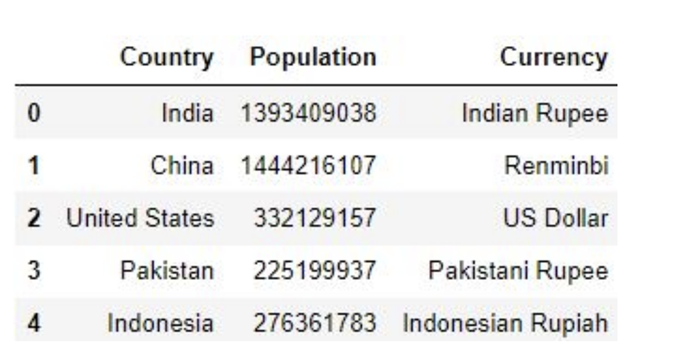

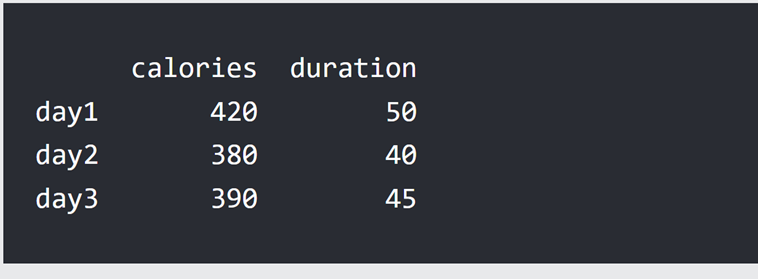

In [9]:
index = ["day1", "day2","day3"]

In [10]:
calories = [420,380,390]
duration = [50,40,45]

In [13]:
data1 = {"calories" : calories, "duration" : duration}
data1

{'calories': [420, 380, 390], 'duration': [50, 40, 45]}

In [18]:
data = pd.DataFrame(data1)
data

,calories,duration
0,420,50
1,380,40
2,390,45


# Pandas use the loc attribute to return one or more specified row(s)

In [23]:
data.loc[0]

calories    420
duration     50
Name: 0, dtype: int64

In [24]:
data.loc[1]

calories    380
duration     40
Name: 1, dtype: int64

In [26]:
data.loc[0:1]

,calories,duration
0,420,50
1,380,40


In [27]:
Data = pd.DataFrame(data1,index = ["day1","day2","day3"])
Data

,calories,duration
day1,420,50
day2,380,40
day3,390,45


In [28]:
Data.loc["day1"]

calories    420
duration     50
Name: day1, dtype: int64

In [46]:
import pandas as pd

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}

df = pd.DataFrame(data)
df

,name,age,qualified
0,Sally,50,True
1,Mary,40,False
2,John,30,False


###  The drop() method removes the specified row or column.

#####  By specifying the column axis (axis='columns'), the drop() method removes the specified column.

#####  By specifying the row axis (axis='index'), the drop() method removes the specified row.

In [34]:
df = df.drop("age", axis = 1)
df

,name,qualified
0,Sally,True
1,Mary,False
2,John,False


In [44]:
df1 = df.drop("name", axis = 'columns')
df1

,age,qualified
0,50,True
1,40,False
2,30,False


In [36]:
df = df.drop(0,axis = 0)
df

,qualified
1,False
2,False


In [45]:
df2 = df.drop(1,axis = "index")
df2

,name,age,qualified
0,Sally,50,True
2,John,30,False


In [47]:
df

,name,age,qualified
0,Sally,50,True
1,Mary,40,False
2,John,30,False


In [48]:
df.columns

Index(['name', 'age', 'qualified'], dtype='object')

In [49]:
df["age"]

0    50
1    40
2    30
Name: age, dtype: int64

In [51]:
df["age","qualified"]

KeyError: ('age', 'qualified')

In [50]:
df[["age","qualified"]]

,age,qualified
0,50,True
1,40,False
2,30,False


In [56]:
import pandas as pd

# create DataFrame with Team records
dataFrame = pd.DataFrame({'Team ID': {0: 5, 1: 9, 2: 6, 3: 11, 4: 2, 5: 7 },'Team Name': {0: 'India', 1: 'Australia', 2: 'Bangladesh', 3: 'South Africa', 4: 'Sri Lanka', 5: 'England'},'Team Points': {0: 95, 1: 93, 2: 42, 3: 60, 4: 80, 5: 55},'Team Rank': {0: 'One', 1: 'Two', 2: 'Six', 3: 'Four', 4: 'Three', 5: 'Five'}})
dataFrame


,Team ID,Team Name,Team Points,Team Rank
0,5,India,95,One
1,9,Australia,93,Two
2,6,Bangladesh,42,Six
3,11,South Africa,60,Four
4,2,Sri Lanka,80,Three
5,7,England,55,Five


In [55]:
dataFrame = dataFrame.set_index("Team ID")
dataFrame

,Team Name,Team Points,Team Rank
Team ID,,,
5,India,95,One
9,Australia,93,Two
6,Bangladesh,42,Six
11,South Africa,60,Four
2,Sri Lanka,80,Three
7,England,55,Five


In [58]:
dataFrame1 = dataFrame.set_index("Team Rank")
dataFrame1

,Team ID,Team Name,Team Points
Team Rank,,,
One,5,India,95
Two,9,Australia,93
Six,6,Bangladesh,42
Four,11,South Africa,60
Three,2,Sri Lanka,80
Five,7,England,55
